In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [4]:
# Loading the newly uploaded CSV file
new_file_path = '../Data/indiumSamp.csv'
new_data = pd.read_csv(new_file_path)

# Displaying the first few rows of the new dataset
new_data.head()

,Start_Location,End_Location,Start_Time,End_Time,Trip_Duration(min),Driver_Name,Driver_Score,Average_Speed(km/h),Impact,Driving_Violations,Vehicle_Health,Trip_Date
0,Port Melbourne,East Melbourne,2020-09-22 05:20:31,2020-09-22 06:12:31,52.0,John Rivas,1.17,106.43,True,True,Okay,2020-09-22
1,Parkville,Port Melbourne,2021-09-01 22:06:43,2021-09-01 22:57:43,51.0,Kimberly Holmes,1.99,59.39,False,True,Urgent,2021-09-01
2,Parkville,North Melbourne,2021-05-18 07:10:06,2021-05-18 08:33:06,83.0,Joy Jackson,3.96,22.77,False,False,Urgent,2021-05-18
3,South Wharf,Parkville,2021-05-22 01:20:48,2021-05-22 02:45:48,85.0,Jay Flores,1.81,103.89,True,True,Good,2021-05-22
4,Docklands,Kensington,2020-11-20 09:41:47,2020-11-20 10:52:47,71.0,Jennifer Arellano,2.91,25.94,True,False,Okay,2020-11-20


In [5]:
# Checking for missing values in the new dataset
new_missing_values = new_data.isnull().sum()

# Converting 'Impact' to numerical values (0 for False, 1 for True)
new_data['Impact'] = new_data['Impact'].astype(int)

# Encoding 'Start_Location' and 'End_Location' using label encoding
new_data['Start_Location'] = new_data['Start_Location'].astype('category').cat.codes
new_data['End_Location'] = new_data['End_Location'].astype('category').cat.codes

# Encoding 'Vehicle_Health' using one-hot encoding
new_vehicle_health_dummies = pd.get_dummies(new_data['Vehicle_Health'], prefix='Vehicle_Health')
new_data = pd.concat([new_data, new_vehicle_health_dummies], axis=1)
new_data.drop('Vehicle_Health', axis=1, inplace=True)

# Encoding 'Driving_Violations' to numerical values (0 for False, 1 for True)
new_data['Driving_Violations'] = new_data['Driving_Violations'].astype(int)

# Dropping unnecessary columns
new_data.drop(['Start_Time', 'End_Time', 'Driver_Name', 'Trip_Date'], axis=1, inplace=True)

# Displaying the first few rows of the preprocessed new dataset
new_data.head(), new_missing_values


(   Start_Location  End_Location  Trip_Duration(min)  Driver_Score  \
 0               6             2                52.0          1.17   
 1               5             6                51.0          1.99   
 2               5             4                83.0          3.96   
 3               7             5                85.0          1.81   
 4               1             3                71.0          2.91   
 
    Average_Speed(km/h)  Impact  Driving_Violations  Vehicle_Health_Good  \
 0               106.43       1                   1                    0   
 1                59.39       0                   1                    0   
 2                22.77       0                   0                    0   
 3               103.89       1                   1                    1   
 4                25.94       1                   0                    0   
 
    Vehicle_Health_Okay  Vehicle_Health_Urgent  
 0                    1                      0  
 1                    

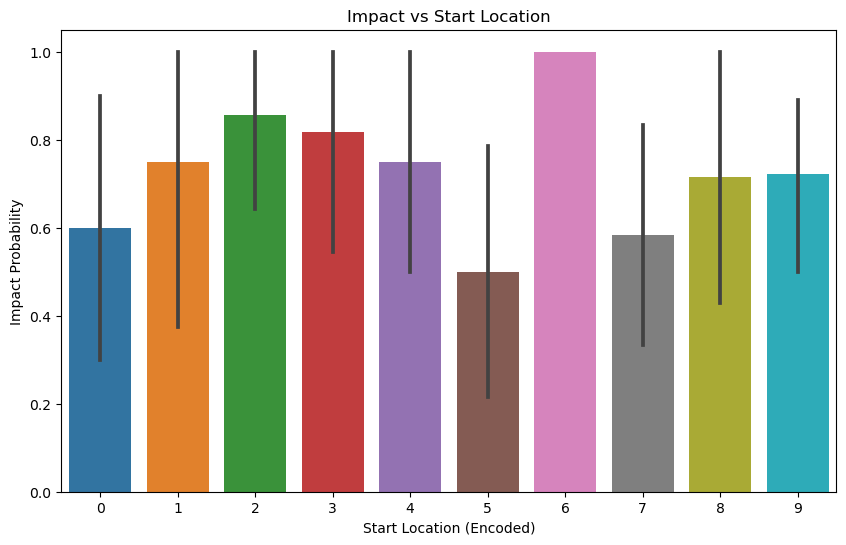

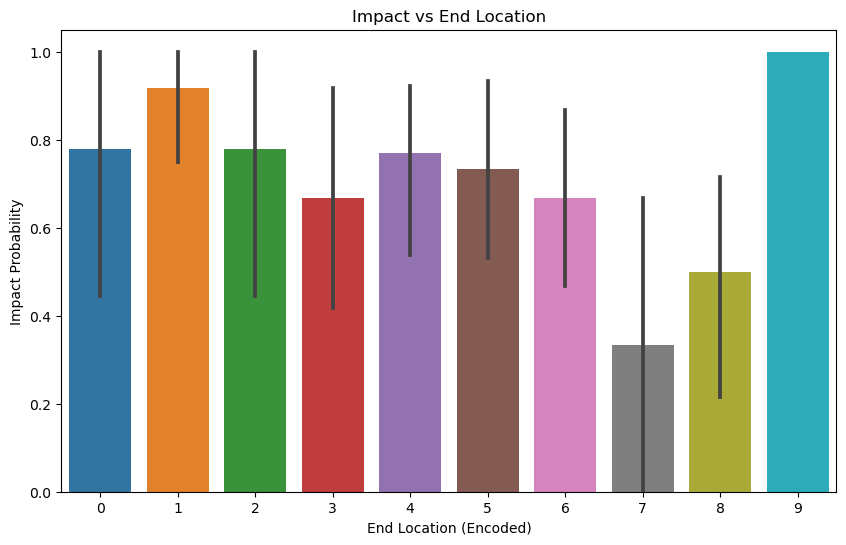

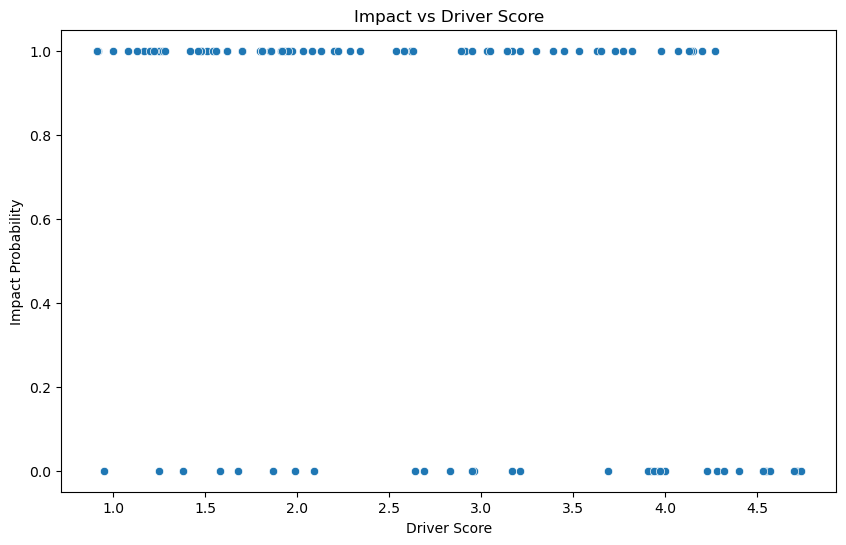

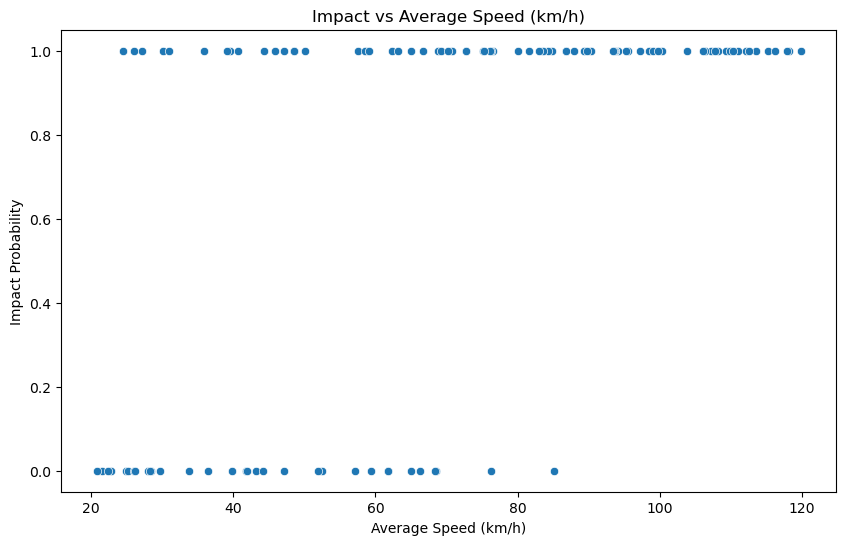

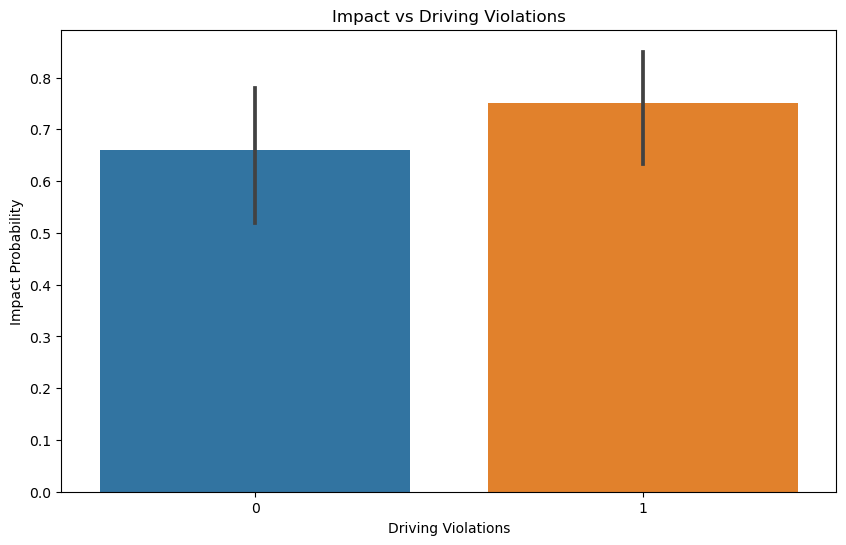

In [11]:
# Plotting the relationship between 'Start_Location' and 'Impact' for the new dataset
plt.figure(figsize=(10, 6))
sns.barplot(x='Start_Location', y='Impact', data=new_data)
plt.title('Impact vs Start Location')
plt.xlabel('Start Location (Encoded)')
plt.ylabel('Impact Probability')
plt.show()

# Plotting the relationship between 'End_Location' and 'Impact' for the new dataset
plt.figure(figsize=(10, 6))
sns.barplot(x='End_Location', y='Impact', data=new_data)
plt.title('Impact vs End Location')
plt.xlabel('End Location (Encoded)')
plt.ylabel('Impact Probability')
plt.show()

# Plotting the relationship between 'Driver_Score' and 'Impact' for the new dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Driver_Score', y='Impact', data=new_data)
plt.title('Impact vs Driver Score')
plt.xlabel('Driver Score')
plt.ylabel('Impact Probability')
plt.show()

# Plotting the relationship between 'Average_Speed(km/h)' and 'Impact' for the new dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Speed(km/h)', y='Impact', data=new_data)
plt.title('Impact vs Average Speed (km/h)')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Impact Probability')
plt.show()

# Plotting the relationship between 'Driving_Violations' and 'Impact' for the new dataset
plt.figure(figsize=(10, 6))
sns.barplot(x='Driving_Violations', y='Impact', data=new_data)
plt.title('Impact vs Driving Violations')
plt.xlabel('Driving Violations')
plt.ylabel('Impact Probability')
plt.show()


In [14]:
# Separating the features (X) and target variable (y) for the new dataset
X_new = new_data.drop('Impact', axis=1)
y_new = new_data['Impact']

# Splitting the new data into training and testing sets (80% training, 20% testing)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Checking the shape of the training and testing sets for the new dataset
X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape


((88, 9), (22, 9), (88,), (22,))

In [15]:
# Importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest Classifier
rf_model_new = RandomForestClassifier(random_state=42)

# Training the model on the new training data
rf_model_new.fit(X_train_new, y_train_new)

# Evaluating the training score
training_score_new = rf_model_new.score(X_train_new, y_train_new)
training_score_new


1.0

In [16]:
# Importing necessary metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Predicting the impact on the testing data
y_pred_new = rf_model_new.predict(X_test_new)

# Calculating the accuracy score
accuracy_new = accuracy_score(y_test_new, y_pred_new)

# Calculating the confusion matrix
conf_matrix_new = confusion_matrix(y_test_new, y_pred_new)

# Calculating precision, recall, and F1-score
precision_new = precision_score(y_test_new, y_pred_new)
recall_new = recall_score(y_test_new, y_pred_new)
f1_new = f1_score(y_test_new, y_pred_new)

accuracy_new, conf_matrix_new, precision_new, recall_new, f1_new

(0.7727272727272727,
 array([[ 5,  3],
        [ 2, 12]]),
 0.8,
 0.8571428571428571,
 0.8275862068965518)